This notebook aims in cleaning the datasets and using the clean meerged datasets to answer 6 research questions. 

We use several techniques to clean and tidy the datasets in the notebook to facilitate the usage of them.



# Data Cleaning & Tidying

We first import all the possibly needed modules.

In [3]:
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

We first start be reading the happiness datasets, each year is represented by 1 dataset, so we create a new column "Year" from the dataframe's name to distguish between the years and we drop columns that will not be needed in our research questions and appropriate columns are renamed to be uniform across all 5 datasets. To make sure all 5 datasets are the same df.info() is used to have a better idea of the dataset's contents.

In [4]:
#read the csv
happiness_df = pd.read_csv("2015.csv")
happiness_df['Year']= '2015'
happiness_df = happiness_df.rename(columns={'Family': 'Social support'})
happiness_df.drop('Standard Error',axis='columns', inplace=True)
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


# New Section

In [5]:
print(happiness_df.shape)
happiness_df.info()

(158, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Social support                 158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Year                           158 non-null    object 
dtypes: float64(8), int64(1), object(3)
memor

In [6]:
happiness_df1 = pd.read_csv("2016.csv")
happiness_df1['Year']= '2016'
happiness_df1.drop('Lower Confidence Interval',axis='columns', inplace=True)
happiness_df1.drop('Upper Confidence Interval',axis='columns', inplace=True)
happiness_df1 = happiness_df1.rename(columns={'Family': 'Social support'})
happiness_df1.head(1)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


In [7]:
print(happiness_df1.shape)
happiness_df1.info()

(157, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Economy (GDP per Capita)       157 non-null    float64
 5   Social support                 157 non-null    float64
 6   Health (Life Expectancy)       157 non-null    float64
 7   Freedom                        157 non-null    float64
 8   Trust (Government Corruption)  157 non-null    float64
 9   Generosity                     157 non-null    float64
 10  Dystopia Residual              157 non-null    float64
 11  Year                           157 non-null    object 
dtypes: float64(8), int64(1), object(3)
memor

In [8]:
happiness_df2 = pd.read_csv("2017.csv")
happiness_df2['Year']= '2017'
happiness_df2 = happiness_df2.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Whisker.high': 'Upper Confidence Interval', 'Whisker.low': 'Lower Confidence Interval','Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Family': 'Social support','Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Trust..Government.Corruption.': 'Trust (Government Corruption)','Dystopia.Residual': 'Dystopia Residual' })
happiness_df2.drop('Lower Confidence Interval',axis='columns', inplace=True)
happiness_df2.drop('Upper Confidence Interval',axis='columns', inplace=True)
happiness_df2.head(1)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017


In [9]:
print(happiness_df2.shape)
happiness_df2.info()

(155, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Economy (GDP per Capita)       155 non-null    float64
 4   Social support                 155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom                        155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Dystopia Residual              155 non-null    float64
 10  Year                           155 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 13.4+ KB


In [10]:
happiness_df3 = pd.read_csv("2018.csv")
happiness_df3['Year']= '2018'
happiness_df3 = happiness_df3.rename(columns={'Country or region': 'Country','Overall rank': 'Happiness Rank','Score': 'Happiness Score','GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)'})
happiness_df3.head(1)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018


In [11]:
print(happiness_df3.shape)
happiness_df3.info()

(156, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Social support                 156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Year                           156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [12]:
happiness_df4 = pd.read_csv("2019.csv")
happiness_df4['Year']= '2019'
happiness_df4 = happiness_df4.rename(columns={'Country or region': 'Country','Overall rank': 'Happiness Rank','Score': 'Happiness Score','GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)'})
happiness_df4.head(1)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2019


In [13]:
print(happiness_df4.shape)
happiness_df4.info()

(156, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Social support                 156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [14]:
print(happiness_df.shape)
happiness_df.info()

(158, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Social support                 158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Year                           158 non-null    object 
dtypes: float64(8), int64(1), object(3)
memor

Now since all 5 dataframes are uniform, they're appended together into 1 dataframe.

In [15]:
df_happiness = pd.concat([happiness_df, happiness_df1, happiness_df2, happiness_df3, happiness_df4], sort=False)
df_happiness.head(1)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


In [16]:
col = happiness_df4["Country"]
col1 = happiness_df["Country"]
dt = col.append(col1, ignore_index = True) 
unique_valuess =  np.unique(dt.values)
print(unique_valuess.size)

165


**Below we dig into the dataframe to see all *missing values*, luckily all missing values are in columns that won't be needed to answer any of our research questions so they're dropped.**

In [17]:
missing_values_count_happiness_df = df_happiness.isnull().sum()
print(missing_values_count_happiness_df)

Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Social support                     0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
Year                               0
dtype: int64


In [18]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_happiness = np.product(df_happiness.shape) 
total_missing_values_happiness = missing_values_count_happiness_df.sum()

# percent of data that is missing
percentage_missing_values_happiness = (total_missing_values_happiness/total_cells_happiness) * 100
print(percentage_missing_values_happiness)

8.312020460358056


In [19]:
# get the number of missing data points per column
df_happiness=df_happiness.drop(['Dystopia Residual'], axis=1)
missing_values_count_happiness_df = df_happiness.isnull().sum()
print(missing_values_count_happiness_df)

Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Social support                     0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Year                               0
dtype: int64


In [20]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_happiness = np.product(df_happiness.shape) 
total_missing_values_happiness = missing_values_count_happiness_df.sum()

# percent of data that is missing
percentage_missing_values_happiness = (total_missing_values_happiness/total_cells_happiness) * 100
print(percentage_missing_values_happiness)

5.440595210416182


In [21]:
# get the number of missing data points per column
df_happiness=df_happiness.drop(['Region'], axis=1)
df_happiness=df_happiness.dropna()
missing_values_count_happiness_df = df_happiness.isnull().sum()
print(missing_values_count_happiness_df)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64


In [22]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_happiness = np.product(df_happiness.shape) 
total_missing_values_happiness = missing_values_count_happiness_df.sum()

# percent of data that is missing
percentage_missing_values_happiness = (total_missing_values_happiness/total_cells_happiness) * 100
print(percentage_missing_values_happiness)

0.0


**To remove outliers, LOF method is used as shown below on columns that will be used in the research questions and are likely to have outliers.**

In [23]:
X = df_happiness[['Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Health (Life Expectancy)' ]].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)

print(X_filtered.shape)

(781, 3)
(758, 3)


**The second dataset, "Life Expectancy" is loaded and the shape and info are printed to have a better idea of what the dataset provides. **

In [24]:
df_life_expectancy = pd.read_csv("Life Expectancy Data.csv")
df_life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
print(df_life_expectancy.shape)
df_life_expectancy.info()

(2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio    

**Missing values are shown and percentage is calculated below, columns that have missing values and are not needed are dropped**

In [26]:
# get the number of missing data points per column
missing_values_count_life_expect = df_life_expectancy.isnull().sum()
#look at the missing value
print(missing_values_count_life_expect)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [27]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_life_expect = np.product(df_life_expectancy.shape) 
total_missing_life_expect = missing_values_count_life_expect.sum()

# percent of data that is missing
percentage_missign_values_life_expect = (total_missing_life_expect/total_cells_life_expect) * 100
print(percentage_missign_values_life_expect)

3.965282505105514


In [28]:
df_life_expectancy.drop('Hepatitis B',axis='columns', inplace=True)
df_life_expectancy.drop('Income composition of resources',axis='columns', inplace=True)
df_life_expectancy.drop('Total expenditure',axis='columns', inplace=True)
df_life_expectancy.drop('Schooling',axis='columns', inplace=True)
df_life_expectancy.drop('Alcohol',axis='columns', inplace=True)
df_life_expectancy.drop('Population',axis='columns', inplace=True)
df_life_expectancy.drop(' BMI ',axis='columns', inplace=True)
df_life_expectancy.drop('Polio',axis='columns', inplace=True)
df_life_expectancy.drop('Diphtheria ',axis='columns', inplace=True)
missing_values_count_life_expect = df_life_expectancy.isnull().sum()
print(missing_values_count_life_expect)
total_cells_life_expect = np.product(df_life_expectancy.shape) 
total_missing_life_expect = missing_values_count_life_expect.sum()

# percent of data that is missing
percentage_missign_values_life_expect = (total_missing_life_expect/total_cells_life_expect) * 100
print(percentage_missign_values_life_expect)

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult Mortality            10
infant deaths               0
percentage expenditure      0
Measles                     0
under-five deaths           0
 HIV/AIDS                   0
GDP                       448
 thinness  1-19 years      34
 thinness 5-9 years        34
dtype: int64
1.4033617845734931


In [29]:
df_missing = df_life_expectancy[ df_life_expectancy['GDP'].isnull()]

In [30]:
missing_values_count_life_expect = df_life_expectancy.isnull().sum()
total_cells_life_expect = np.product(df_life_expectancy.shape) 
total_missing_life_expect = missing_values_count_life_expect.sum()

# percent of data that is missing
percentage_missign_values_life_expect = (total_missing_life_expect/total_cells_life_expect) * 100
print(percentage_missign_values_life_expect)

1.4033617845734931


Since all remaining missing values are of the same countries which is due to the data being unavailable and the percentage of missing values is less than 2%, the rows with null values re dropped from the dataset.

In [31]:
df_life_expectancy = df_life_expectancy.dropna()

In [32]:
missing_values_count_life_expect = df_life_expectancy.isnull().sum()
total_cells_life_expect = np.product(df_life_expectancy.shape) 
total_missing_life_expect = missing_values_count_life_expect.sum()

# percent of data that is missing
percentage_missign_values_life_expect = (total_missing_life_expect/total_cells_life_expect) * 100
print(percentage_missign_values_life_expect)

0.0


**Removing Outliers using LOF for columns needed in research questions.**

In [33]:
X = df_life_expectancy[['GDP', 'Life expectancy ']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)

(2461, 2)
(2450, 2)


**The last dataset is loaded and the same preprocessing steps are taken as the previous datasets**

In [34]:
df_countries = pd.read_csv("250 Country Data.csv")
df_countries = df_countries.rename(columns={'name': 'Country','region': 'Region','subregion': 'Subregion', 'population': 'Population', 'area': 'Area', 'gini': 'GINI'})
df_countries.drop('Unnamed: 0',axis='columns', inplace=True)
df_countries.head()

,Country,Region,Subregion,Population,Area,GINI,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN


In [35]:
print(df_countries.shape)
df_countries.info()

(250, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                250 non-null    object 
 1   Region                 248 non-null    object 
 2   Subregion              247 non-null    object 
 3   Population             250 non-null    int64  
 4   Area                   240 non-null    float64
 5   GINI                   153 non-null    float64
 6   Real Growth Rating(%)  171 non-null    object 
 7   Literacy Rate(%)       176 non-null    object 
 8   Inflation(%)           168 non-null    object 
 9   Unemployement(%)       168 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 19.7+ KB


Since from the info of the dataset clearly shows that there's a lot of missing values, the below queries are an attempt to understand if there's a relationship between missing values.

In [36]:
df_countries[df_countries['Country'] == "Bolivia (Plurinational State of)"]

,Country,Region,Subregion,Population,Area,GINI,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
26,Bolivia (Plurinational State of),Americas,South America,10985059,1098581.0,56.3,NaN,NaN,NaN,NaN


In [37]:
df_countries[df_countries['Unemployement(%)'].isnull() & (df_countries['Real Growth Rating(%)'].isnull()) ]

,Country,Region,Subregion,Population,Area,GINI,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
8,Antarctica,Polar,NaN,1000,14000000.0,NaN,NaN,NaN,NaN,NaN
11,Armenia,Asia,Western Asia,2994400,29743.0,30.9,NaN,99.4% (2012 est.),NaN,NaN
17,Bahrain,Asia,Western Asia,1404900,765.0,NaN,NaN,NaN,NaN,NaN
26,Bolivia (Plurinational State of),Americas,South America,10985059,1098581.0,56.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
243,Venezuela (Bolivarian Republic of),Americas,South America,31028700,916445.0,44.8,NaN,NaN,NaN,NaN
244,Viet Nam,Asia,South-Eastern Asia,92700000,331212.0,35.6,NaN,NaN,NaN,NaN
245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,NaN,NaN,NaN,NaN,NaN
246,Western Sahara,Africa,Northern Africa,510713,266000.0,NaN,NaN,NaN,NaN,NaN


In [38]:
np.unique(df_countries[df_countries['Inflation(%)'].isnull()| df_countries['Unemployement(%)'].isnull()]['Country'])


array(['American Samoa', 'Antarctica', 'Armenia', 'Bahrain',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Bouvet Island', 'British Indian Ocean Territory',
       'Brunei Darussalam', 'Cabo Verde', 'Canada', 'Chile', 'China',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo (Democratic Republic of the)', 'Cook Islands',
       'Curaçao', "Côte d'Ivoire", 'Falkland Islands (Malvinas)',
       'French Guiana', 'French Southern Territories', 'Gambia',
       'Guernsey', 'Heard Island and McDonald Islands', 'Holy See',
       'Hong Kong', 'Hungary', 'Iran (Islamic Republic of)',
       'Isle of Man', 'Jamaica', 'Jersey',
       "Korea (Democratic People's Republic of)", 'Korea (Republic of)',
       "Lao People's Democratic Republic", 'Luxembourg', 'Macao',
       'Macedonia (the former Yugoslav Republic of)',
       'Micronesia (Federated States of)', 'Moldova (Republic of)

From the queries above, it is clear that many countries probably have missing vaalues since the data is unknown and these countries usually have a single instance in the dataset. Below, missing values are counted and percentage of missing values i calculated.

In [39]:
# get the number of missing data points per column
missing_values_count_countries = df_countries.isnull().sum()
#look at the missing value
print(missing_values_count_countries)

Country                   0
Region                    2
Subregion                 3
Population                0
Area                     10
GINI                     97
Real Growth Rating(%)    79
Literacy Rate(%)         74
Inflation(%)             82
Unemployement(%)         82
dtype: int64


In [40]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_countries = np.product(df_countries.shape) 
total_missing_countries = missing_values_count_countries.sum()

# percent of data that is missing
percentage_missign_values_countries = (total_missing_countries/total_cells_countries) * 100
print(percentage_missign_values_countries)

17.16


17.16% of the data missing is a very big number, and dropping columnsin that case did not help bring that number down a lot. Since the dataset did not have the year of the reported values in a column, we extracted it from the 3 columns that have the year included in them which are 'Unemployment', 'Inflation' and 'Literacy Rate'.

In [41]:
df_countries[['Inflation(%)','Year (Inflation)']] = df_countries['Inflation(%)'].str.split("(", expand=True)
df_countries['Inflation(%)'] = df_countries['Inflation(%)'].str.extract('(\d+\.\d+)')
df_countries['Year (Inflation)'] = df_countries['Year (Inflation)'].str.extract('(\d+)')

In [42]:
df_countries[['Real Growth Rating(%)','Year (Real Growth Rating)']] = df_countries['Real Growth Rating(%)'].str.split("(", expand=True)
df_countries['Real Growth Rating(%)'] = df_countries['Real Growth Rating(%)'].str.extract('(\d+\.\d+)')
df_countries['Year (Real Growth Rating)'] = df_countries['Year (Real Growth Rating)'].str.extract('(\d+)')


In [43]:
df_countries[['Literacy Rate(%)','Year (Literacy Rate)']] = df_countries['Literacy Rate(%)'].str.split("%", expand=True)
df_countries['Literacy Rate(%)'] = df_countries['Literacy Rate(%)'].str.extract('(\d+\.\d+)')
df_countries['Year (Literacy Rate)'] = df_countries['Year (Literacy Rate)'].str.extract('(\d+)')

In [44]:
df1 = df_countries['Unemployement(%)'].str.split(n=1, expand=True)
df1.columns = ['STATUS_ID{}'.format(x+1) for x in df1.columns]
df1['STATUS_ID2'] = df1['STATUS_ID2'].str.extract('(\d+)')
df1['STATUS_ID1'] = df1['STATUS_ID1'].str.split("%", expand=True)
print(df1)

    STATUS_ID1 STATUS_ID2
0           35       2008
1          NaN        NaN
2         16.9       2013
3         10.3        NaN
4          NaN        NaN
..         ...        ...
245        NaN        NaN
246        NaN        NaN
247         35       2003
248         15       2008
249        NaN        NaN

[250 rows x 2 columns]


In [45]:
df_countries['Unemployement1(%)'] = df1['STATUS_ID1']
df_countries['Year (Unemployement)'] = df1['STATUS_ID2']

**Here is the dataframe with the new generated columns.**

In [46]:
df_countries.head()

,Country,Region,Subregion,Population,Area,GINI,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Year (Inflation),Year (Real Growth Rating),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35% (2008 est.).,2013,2013,2000,35,2008
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,NaN,98.7,1.7,16.9% official rate (2013 est.). Note: These a...,2013,2013,2011,16.9,2013
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,NaN,3.9,10.3%.,NaN,NaN,NaN,10.3,NaN
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN


After creating the new columns the percentage of missing values increased drastically as shown below. Columns that aren't needed are dropped which decreases the percentage of missing values from 35.6% to 21.4%.

In [47]:
df_countries.drop('GINI',axis='columns', inplace=True)

missing_values_count_countries = df_countries.isnull().sum()
#look at the missing value
total_cells_countries = np.product(df_countries.shape) 
total_missing_countries = missing_values_count_countries.sum()

# percent of data that is missing
percentage_missign_values_countries = (total_missing_countries/total_cells_countries) * 100
print(percentage_missign_values_countries)

35.628571428571426


In [48]:
# get the number of missing data points per column
df_countries.drop('Real Growth Rating(%)',axis='columns', inplace=True)
df_countries.drop('Year (Real Growth Rating)',axis='columns', inplace=True)
df_countries.drop('Unemployement(%)',axis='columns', inplace=True)
df_countries.drop('Inflation(%)',axis='columns', inplace=True)
df_countries.drop('Year (Inflation)',axis='columns', inplace=True)
missing_values_count_countries = df_countries.isnull().sum()
#look at the missing value
print(missing_values_count_countries)

Country                   0
Region                    2
Subregion                 3
Population                0
Area                     10
Literacy Rate(%)        128
Year (Literacy Rate)     87
Unemployement1(%)        82
Year (Unemployement)    171
dtype: int64


In [49]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_countries = np.product(df_countries.shape) 
total_missing_countries = missing_values_count_countries.sum()

# percent of data that is missing
percentage_missign_values_countries = (total_missing_countries/total_cells_countries) * 100
print(percentage_missign_values_countries)

21.46666666666667


Multiple methods are used to fill the remaining missing values. ***bfill*** method is used and so is replacing missing values with the mean.

In [50]:
df_countries['Unemployement1(%)'] = df_countries['Unemployement1(%)'].replace("n.a.", method='bfill')
df_countries['Unemployement1(%)'] = df_countries['Unemployement1(%)'].replace("N.A.", method='bfill')
df_countries['Unemployement1(%)'] = df_countries['Unemployement1(%)'].replace("10.9.", '10.9')
df_countries['Year (Unemployement)'] = df_countries['Year (Unemployement)'].replace("nan", method='bfill')
df_countries['Year (Unemployement)'] = df_countries['Year (Unemployement)'].replace("NaN", method='bfill')

In [51]:
#df_countries['Inflation(%)'] = df_countries['Inflation(%)'].astype(float)
df_countries['Literacy Rate(%)'] = df_countries['Literacy Rate(%)'].astype(float)
df_countries['Unemployement1(%)'] = df_countries['Unemployement1(%)'].astype(float)
df_countries['Year (Unemployement)'] = df_countries['Year (Unemployement)'].astype("Float32").astype("Int32")
df_countries['Year (Literacy Rate)'] = df_countries['Year (Literacy Rate)'].astype("Float32").astype("Int32")

In [52]:
mean_literacy = np.mean(df_countries['Literacy Rate(%)'])
mean_unemployment = np.mean(df_countries['Unemployement1(%)'])

In [53]:
df_countries['Literacy Rate(%)'].fillna(mean_literacy, inplace=True) #inplace doesnt require me to aassign result to a new df
df_countries['Unemployement1(%)'].fillna(mean_unemployment, inplace=True) #inplace doesnt require me to aassign result to a new df


In [54]:
df_countries['Year (Literacy Rate)'].fillna(method = "bfill", inplace=True)
df_countries['Year (Unemployement)'].fillna(method = "bfill", inplace=True)

In [55]:
df_countries.drop('Region',axis='columns', inplace=True)
df_countries.drop('Subregion',axis='columns', inplace=True)
df_countries.drop('Area',axis='columns', inplace=True)

In [56]:
df_countries = df_countries.dropna(axis='rows')

In [57]:
missing_values_count_countries = df_countries.isnull().sum()
#look at the missing value
print(missing_values_count_countries)

Country                 0
Population              0
Literacy Rate(%)        0
Year (Literacy Rate)    0
Unemployement1(%)       0
Year (Unemployement)    0
dtype: int64


In [58]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_countries = np.product(df_countries.shape) 
total_missing_countries = missing_values_count_countries.sum()

# percent of data that is missing
percentage_missign_values_countries = (total_missing_countries/total_cells_countries) * 100
print(percentage_missign_values_countries)

0.0


In this part, data is validates for years (new columns) and manually fix incorrect values.

In [59]:
df_countries['Year (Unemployement)']=df_countries['Year (Unemployement)'].astype(str)
unique_values =  np.unique(df_countries[['Year (Unemployement)']].values)
print(unique_values)

['1997' '1998' '1999' '20' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '25' '3' '30' '7'
 '80']


In [60]:
df_countries[df_countries['Year (Unemployement)']=="03"]

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)


In [61]:
df_countries.loc[df_countries['Year (Unemployement)']=="03", 'Year (Unemployement)'] = '2003'

In [62]:
df_countries[df_countries['Year (Unemployement)']=="20"]

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
216,Svalbard and Jan Mayen,2562,81.600246,2003,14.111914,20
217,Swaziland,1132657,81.600246,2003,14.111914,20
218,Sweden,9894888,81.600246,2003,8.100000,20
219,Switzerland,8341600,81.600246,2003,3.200000,20
220,Syrian Arab Republic,18564000,81.600246,2003,14.111914,20
221,Taiwan,23503349,96.100000,2003,4.100000,20
222,Tajikistan,8593600,99.700000,2011,2.500000,20
223,"Tanzania, United Republic of",55155000,81.600246,2005,14.111914,20
224,Thailand,65327652,93.500000,2005,0.700000,20
225,Timor-Leste,1167242,58.600000,2002,20.000000,20


In [63]:
df_countries.iloc[225, df_countries.columns.get_loc('Year (Unemployement)')] = '2001'
#df_countries.iloc[241, df_countries.columns.get_loc('Year (Unemployement)')] = 'nan'

In [64]:
df_countries[df_countries['Year (Unemployement)']=="25"]

#estimated 25% --2013

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
144,Mexico,122273473,93.500000,2011,4.900000,25
196,Sao Tome and Principe,187356,81.600246,2011,14.111914,25
197,Saudi Arabia,32248200,87.200000,2011,10.500000,25


In [65]:
df_countries.loc[df_countries['Year (Unemployement)']=="25", 'Year (Unemployement)'] = '2013'

In [66]:
df_countries[df_countries['Year (Unemployement)']=="30"]
#2011

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
98,Heard Island and McDonald Islands,0,81.600246,2011,14.111914,30
99,Holy See,451,81.600246,2011,14.111914,30
100,Honduras,8576532,85.100000,2011,4.500000,30
101,Hong Kong,7324300,81.600246,2015,14.111914,30
102,Hungary,9823000,99.100000,2015,14.111914,30
103,Iceland,334300,81.600246,2003,4.500000,30
104,India,1295210000,62.800000,2006,8.800000,30
105,Indonesia,258705000,92.800000,2011,6.600000,30
106,Côte d'Ivoire,22671331,81.600246,2010,14.111914,30
107,Iran (Islamic Republic of),79369900,81.600246,2010,14.111914,30


In [67]:
df_countries.loc[df_countries['Year (Unemployement)']=="30", 'Year (Unemployement)'] = '2011'

In [68]:
df_countries[df_countries['Year (Unemployement)']=="80"]

#2007

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
58,Cuba,11239004,99.800000,2011,4.300000,80
59,Curaçao,154843,81.600246,2011,14.111914,80
60,Cyprus,847000,98.700000,2011,17.400000,80
61,Czech Republic,10558524,81.600246,2011,7.100000,80
62,Denmark,5717014,81.600246,2003,6.000000,80
63,Djibouti,900000,67.900000,2003,59.000000,80


In [69]:
df_countries.loc[df_countries['Year (Unemployement)']=="80", 'Year (Unemployement)'] = '2007'

In [70]:
df_countries[df_countries['Year (Unemployement)']=="7"]

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployement1(%),Year (Unemployement)
234,Tuvalu,10640,81.600246,2010,8.0,7
235,Uganda,33860700,73.200000,2010,8.0,7
236,Ukraine,42692393,99.700000,2011,8.0,7


In [71]:
df_countries.loc[df_countries['Year (Unemployement)']=="7", 'Year (Unemployement)'] = 'nan'

**Finally, using LOF method, outliers are removed.**

In [72]:
X = df_countries[['Unemployement1(%)','Literacy Rate(%)']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)

print(X_filtered.shape)

(249, 2)
(191, 2)


In [73]:
df_countries = df_countries.rename(columns={'Unemployement1(%)': 'Unemployment(%)'})


# Data Integration



Below, we view the overall look of our 3 datasets before merging them together. Using the merge method, we merge each 2 dataframes into a single dataframe since this is the optimal way to answer our research questions.

In [74]:
df_countries.head()

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployment(%),Year (Unemployement)
0,Afghanistan,27657145,28.100000,2000,35.000000,2008
1,Åland Islands,28875,81.600246,2011,14.111914,2013
2,Albania,2886026,98.700000,2011,16.900000,2013
3,Algeria,40400000,81.600246,1980,10.300000,2012
4,American Samoa,57100,81.600246,1980,14.111914,2012


In [75]:
df_happiness.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [76]:
df_life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,under-five deaths,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,83,0.1,584.259210,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,86,0.1,612.696514,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,89,0.1,631.744976,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,93,0.1,669.959000,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,97,0.1,63.537231,18.2,18.2


Since the range of years in each of our 3 dataframes is non-uniform, an inner-join operation is performed to merge the dataframes (to avoid any missing data cells, missing data is useless in the merged frame) on the 'Country' columns, since this is the only other common column between all datasets.

In [77]:
df_countries_happiness = pd.merge(df_countries, df_happiness, how='inner', left_on='Country', right_on='Country')
df_countries_happiness.head()

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployment(%),Year (Unemployement),Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Afghanistan,27657145,28.1,2000,35.0,2008,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015
1,Afghanistan,27657145,28.1,2000,35.0,2008,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016
2,Afghanistan,27657145,28.1,2000,35.0,2008,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017
3,Afghanistan,27657145,28.1,2000,35.0,2008,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018
4,Afghanistan,27657145,28.1,2000,35.0,2008,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019


In [78]:
df_countries_life_expect = pd.merge(df_countries, df_life_expectancy, how='inner', left_on='Country', right_on='Country')
df_countries_life_expect.head()

,Country,Population,Literacy Rate(%),Year (Literacy Rate),Unemployment(%),Year (Unemployement),Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,under-five deaths,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,27657145,28.1,2000,35.0,2008,2015,Developing,65.0,263.0,62,71.279624,1154,83,0.1,584.259210,17.2,17.3
1,Afghanistan,27657145,28.1,2000,35.0,2008,2014,Developing,59.9,271.0,64,73.523582,492,86,0.1,612.696514,17.5,17.5
2,Afghanistan,27657145,28.1,2000,35.0,2008,2013,Developing,59.9,268.0,66,73.219243,430,89,0.1,631.744976,17.7,17.7
3,Afghanistan,27657145,28.1,2000,35.0,2008,2012,Developing,59.5,272.0,69,78.184215,2787,93,0.1,669.959000,17.9,18.0
4,Afghanistan,27657145,28.1,2000,35.0,2008,2011,Developing,59.2,275.0,71,7.097109,3013,97,0.1,63.537231,18.2,18.2


In [79]:
df_happiness_life_expect = pd.merge(df_happiness, df_life_expectancy, how='inner', left_on='Country', right_on='Country')
df_happiness_life_expect.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year_x,Year_y,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,under-five deaths,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2015,Developed,83.4,49.0,0,0.00000,35,0,0.1,8989.84240,0.4,0.3
1,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2014,Developed,83.2,51.0,0,19479.91161,23,0,0.1,85814.58857,0.4,0.3
2,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2013,Developed,83.0,52.0,0,19099.04506,175,0,0.1,84658.88768,0.4,0.3
3,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2012,Developed,82.7,54.0,0,18379.32974,61,0,0.1,83164.38795,0.5,0.3
4,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2011,Developed,82.6,55.0,0,18822.86732,621,0,0.1,87998.44468,0.5,0.3


#  Data Visualization

# Research Question #1 :  Are people in more literate countries happier?




Since for this question the data has 3 common years, the mean of each year is calculated and used for calculations to be used in visualizations.

In [80]:
df_literacy_happiness = df_countries_happiness.filter(['Happiness Score','Year (Literacy Rate)', 'Year', 'Literacy Rate(%)', 'Country'])
df_literacy_happiness.head()

,Happiness Score,Year (Literacy Rate),Year,Literacy Rate(%),Country
0,3.575,2000,2015,28.1,Afghanistan
1,3.360,2000,2016,28.1,Afghanistan
2,3.794,2000,2017,28.1,Afghanistan
3,3.632,2000,2018,28.1,Afghanistan
4,3.203,2000,2019,28.1,Afghanistan


In [81]:
df_literacy_happiness_1 = df_literacy_happiness.groupby(['Year (Literacy Rate)'])['Literacy Rate(%)'].agg([np.mean])
df_literacy_happiness_2 = df_literacy_happiness.groupby(['Year'])['Happiness Score'].agg([np.mean])

df_literacy_happiness_1.reset_index(level = 0, inplace=True)
df_literacy_happiness_2.reset_index(level = 0, inplace=True)
df_literacy_happiness_1['Year (Literacy Rate)'] = df_literacy_happiness_1['Year (Literacy Rate)'].astype(int)
df_literacy_happiness_2['Year'] = df_literacy_happiness_2['Year'].astype(int)
data_merge2 =  pd.merge(df_literacy_happiness_1, df_literacy_happiness_2, how='inner', left_on='Year (Literacy Rate)', right_on='Year')
data_merge2 = data_merge2.rename(columns={'mean_x': 'Literacy Rate', 'mean_y': 'Happiness Score' })
data_merge2.drop('Year (Literacy Rate)', axis='columns', inplace=True)
data_merge2.head()

,Literacy Rate,Year,Happiness Score
0,78.755249,2015,5.405460
1,94.200000,2016,5.422603
2,68.500000,2017,5.382970


Text(0.5, 1.0, 'Are people in more literate countries happier?')

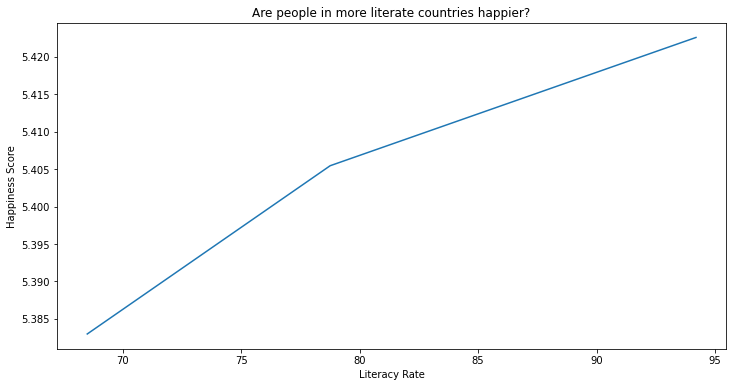

In [82]:
# Set the width and height of the fi gure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
sns.lineplot(x=data_merge2['Literacy Rate'], y= data_merge2['Happiness Score'])
# Add title
plt.title("Are people in more literate countries happier?")

**As the lineplot suggest, from years 2015 to 2017 there is a positive correlation between literacy rate and happiness scores on average across all countries.**

# Research Question #2 : Do people in countries with higher literacy rate live longer?

**The mean of the literacy rate and life expectancy is calculated and used to create 2 new columns for that will be used to plot the relationship and dataset is grouped by 'Year' and then common years are merged by an inner join into a single dataframe.**

In [83]:
df = df_countries_life_expect.filter(['Life expectancy ','Year', 'Status','Literacy Rate(%)', 'Year (Literacy Rate)'], axis=1)

In [84]:
df1 = df.groupby(['Year (Literacy Rate)'])['Literacy Rate(%)'].agg([np.mean])
df2 = df.groupby(['Year'])['Life expectancy '].agg([np.mean])

df1.reset_index(level = 0, inplace=True)
df2.reset_index(level = 0, inplace=True)
u1 = np.unique(df2['Year'].values)
print(u1)
data_merge =  pd.merge(df1, df2, how='inner', left_on='Year (Literacy Rate)', right_on='Year')
data_merge

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


,Year (Literacy Rate),mean_x,Year,mean_y
0,2000,28.100000,2000,67.107895
1,2001,76.789474,2001,67.466667
2,2002,77.333415,2002,67.701961
3,2003,82.075868,2003,67.803268
4,2004,81.600246,2004,68.063636
5,2005,82.400105,2005,68.651948
6,2006,72.875061,2006,69.162338
7,2007,70.750123,2007,69.527273
8,2008,95.400000,2008,69.843791
9,2009,73.680000,2009,70.326144


In [85]:
data_merge.drop('Year (Literacy Rate)', axis='columns', inplace=True)

3 bins are created and used for each 5 years and a pivot table is created showing the mean 'Life expectancy' vs. 'Literacy rate in each bin'

In [86]:
# Dividing the data into bins of 5 years.
bins1 = [ 2000, 2005,  2010, 2015]
labels1 = ['2005s', '2010s' ,'2015s']

#Cutting the Year column of our dataframe df into bins given the above array of bins and array of labels for each bin.
data_merge['decade'] = pd.cut(data_merge['Year'], bins =bins1, labels =labels1)
data_merge = data_merge.rename(columns={'mean_x': "Literacy Rate", 'mean_y': "Life expectancy"}, errors="raise")
literacy_life_expect = data_merge.pivot_table('Literacy Rate', [ 'Life expectancy'],'decade' )
literacy_life_expect.head()

decade,2005s,2010s,2015s
Life expectancy,,,
67.466667,76.789474,NaN,NaN
67.701961,77.333415,NaN,NaN
67.803268,82.075868,NaN,NaN
68.063636,81.600246,NaN,NaN
68.651948,82.400105,NaN,NaN


Since each bin was completely different that the other, it was most appropriate to plot each bin alone as shown below.

In [87]:
literacy_life_expect_2005 = literacy_life_expect
literacy_life_expect_2005 = literacy_life_expect_2005.drop('2010s', axis = "columns", inplace=False)
literacy_life_expect_2005 = literacy_life_expect_2005.drop('2015s', axis = "columns", inplace=False)
literacy_life_expect_2005

decade,2005s
Life expectancy,
67.466667,76.789474
67.701961,77.333415
67.803268,82.075868
68.063636,81.600246
68.651948,82.400105
69.162338,NaN
69.527273,NaN
69.843791,NaN
70.326144,NaN


In [88]:
literacy_life_expect_2010 = literacy_life_expect
literacy_life_expect_2010 = literacy_life_expect_2010.drop('2015s', axis = "columns", inplace=False)
literacy_life_expect_2010 = literacy_life_expect_2010.drop('2005s', axis = "columns", inplace=False)
literacy_life_expect_2010

decade,2010s
Life expectancy,
67.466667,NaN
67.701961,NaN
67.803268,NaN
68.063636,NaN
68.651948,NaN
69.162338,72.875061
69.527273,70.750123
69.843791,95.400000
70.326144,73.680000


In [89]:
literacy_life_expect_2015 = literacy_life_expect
literacy_life_expect_2015 = literacy_life_expect_2015.drop('2010s', axis = "columns", inplace=False)
literacy_life_expect_2015 = literacy_life_expect_2015.drop('2005s', axis = "columns", inplace=False)

literacy_life_expect_2015

decade,2015s
Life expectancy,
67.466667,NaN
67.701961,NaN
67.803268,NaN
68.063636,NaN
68.651948,NaN
69.162338,NaN
69.527273,NaN
69.843791,NaN
70.326144,NaN


Text(0.5, 1.0, 'Do people in more literate countries live longer?')

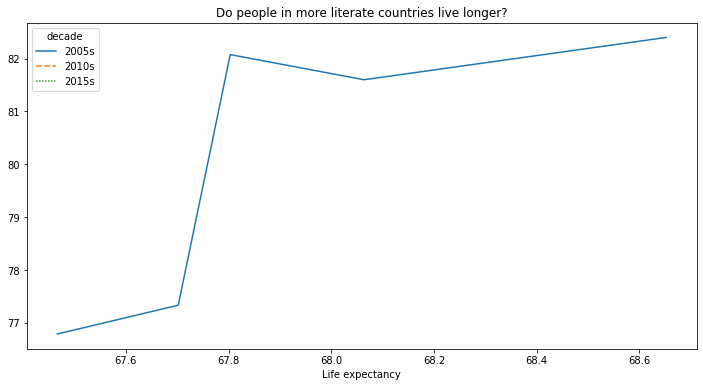

In [90]:
# Set the width and height of the fi gure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
sns.lineplot(data=literacy_life_expect_2005)
# Add title
plt.title("Do people in more literate countries live longer?")

**As shown above, in the years 2000-2005 there was a somewhat positive correlation between literacy rate and life expectancy, suggesting that countries with higher literacy rate tend to have a higher mortality rate.**

Text(0.5, 1.0, 'Do people in more literate countries live longer?')

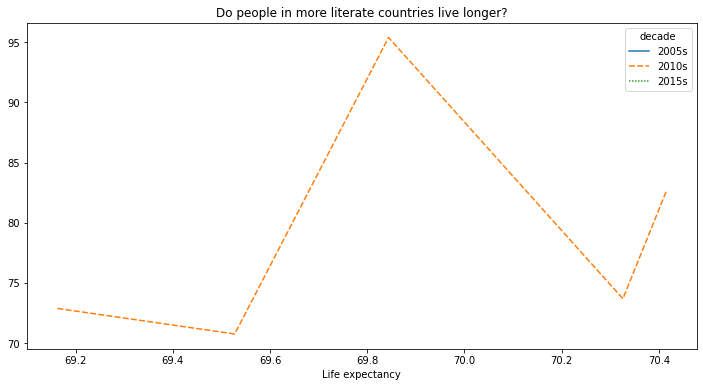

In [91]:
# Set the width and height of the fi gure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
sns.lineplot(data=literacy_life_expect_2010)
# Add title
plt.title("Do people in more literate countries live longer?")

Text(0.5, 1.0, 'Do people in more literate countries live longer?')

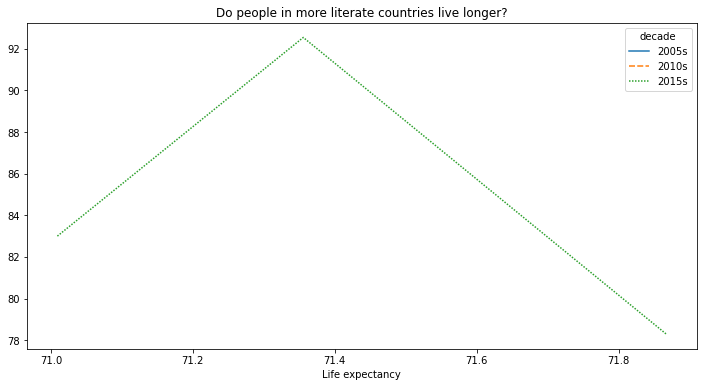

In [92]:
# Set the width and height of the fi gure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
sns.lineplot(data=literacy_life_expect_2015)
# Add title

plt.title("Do people in more literate countries live longer?")

**Findings suggest as shown, that years 2005 to 2015 on average worldwide, there was no direct correlation between life expectancy and literacy rate. This may be due to incorrect or missing data. Further research could be carried to discover this theory in a more accurate manner.**

#Research Question #3:  Do happier people live longer?

Datasets have 3 years in common and so are used to group the data and find the mean of both happiness score and life expectancy and add them in new columns and plot these means on a scatter graph.

In [93]:
df_c = df_happiness_life_expect.filter(['Happiness Score','Country','Life expectancy ', 'Year_y'], axis=1)
df1_c = df_c.groupby(['Country'])['Life expectancy '].agg([np.mean])
df2_c = df_c.groupby(['Country'])['Happiness Score'].agg([np.mean])
df1_c.reset_index(level = 0, inplace=True)
df2_c.reset_index(level = 0, inplace=True)

df_c_merge = pd.merge(df1_c,df2_c, how="inner", left_on='Country', right_on='Country')
df_c_merge = df_c_merge.rename(columns={'mean_x': 'Life expectancy', 'mean_y': 'Happiness Score' })

As shown below, there's a positive correlation between happiness score and life expectancy worldwide.

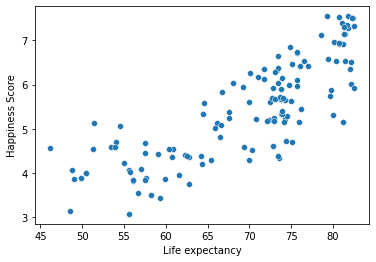

In [94]:
sns.scatterplot(x=df_c_merge['Life expectancy'], y=df_c_merge['Happiness Score'])

**Findings suggest that there is a somewhat positive correlation between life expectancy and happiness score across most countries in the years 2015-2017. Scatter plot was most appropriate in this case to show that while overall there is a positive correlation, there are countries where this hypothesis does not apply.**

# Research Question #4: Do countries with higher GDP spend more on health care?

In [95]:
df_GDP = df_happiness_life_expect.filter(['Country','percentage expenditure', 'Economy (GDP per Capita)', 'Year_x','Year_y' ])
df_GDP.head()

,Country,percentage expenditure,Economy (GDP per Capita),Year_x,Year_y
0,Switzerland,0.00000,1.39651,2015,2015
1,Switzerland,19479.91161,1.39651,2015,2014
2,Switzerland,19099.04506,1.39651,2015,2013
3,Switzerland,18379.32974,1.39651,2015,2012
4,Switzerland,18822.86732,1.39651,2015,2011


Datasets are grouped by 'Country' individually, and both mean 'percentage expenditure' and 'GDP per capita' are calculated and added in new columns. 2 dataframes are merged by the merge method on the 'Country' column, performing an inner join to create a single dataframe. Data with percentage expenditure >200 are excluded since are most likely a data error and should not be taken inot consideration (since these entries are also only a few).

In [96]:
df_GDP= df_GDP[df_GDP['percentage expenditure'] < 200]
df_GDP1 = df_GDP.groupby(['Country'])['percentage expenditure'].agg([np.mean])
df_GDP2 = df_GDP.groupby(['Country'])['Economy (GDP per Capita)'].agg([np.mean])

df_GDP1.reset_index(level = 0, inplace=True)
df_GDP2.reset_index(level = 0, inplace=True)

data_GDP_merge =  pd.merge(df_GDP1, df_GDP2, how='inner', left_on='Country', right_on='Country')
data_GDP_merge = data_GDP_merge.rename(columns={'mean_x': 'percentage expenditure', 'mean_y': 'GDP per capita'})
data_GDP_merge

,Country,percentage expenditure,GDP per capita
0,Afghanistan,34.960110,0.357113
1,Albania,49.793330,0.938633
2,Algeria,71.980742,1.012963
3,Angola,56.229771,0.798380
4,Argentina,92.875006,1.111035
...,...,...,...
128,United Arab Emirates,0.000000,1.532533
129,Uruguay,63.343024,1.135558
130,Uzbekistan,44.373450,0.723758
131,Zambia,89.650407,0.571761


**Bins** are created for ranges of GDP per capita to have smoother line plotting.

In [97]:
bins1 = [ 0.0, 0.25,  0.50, 0.75, 1.00, 1.25, 1.50, 1.75]
labels1 = ['0-0.25', '0.25-0.50' ,'0.50-0.75','0.75-1.00','1.00-1.25','1.25-1.50', '1.50-1.75']

# Cutting the Year column of our dataframe df into bins given the above array of bins and array of labels for each bin.
data_GDP_merge['GDP per capita'] = pd.cut(data_GDP_merge['GDP per capita'], bins =bins1, labels =labels1)

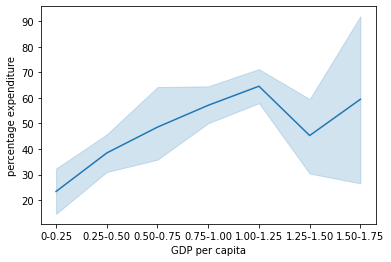

In [98]:
sns.lineplot( x=data_GDP_merge['GDP per capita'],y=data_GDP_merge['percentage expenditure'])

**Findings suggest that there is a positive correlation between GDP per capita in a country and the percentage expenditure spent on healthcare. **

# Research Question #5: Do countries with higher GDP have more trust in the government?

In [99]:
df_trust = df_happiness_life_expect.filter(['Country', 'GDP', 'Trust (Government Corruption)'])
df_trust.head()

,Country,GDP,Trust (Government Corruption)
0,Switzerland,8989.84240,0.41978
1,Switzerland,85814.58857,0.41978
2,Switzerland,84658.88768,0.41978
3,Switzerland,83164.38795,0.41978
4,Switzerland,87998.44468,0.41978


Dataframes are grouped by the country and the GDP mean is calculated and added in a new column which is the data that will be used for visualizations.

In [100]:
df_trust1 = df_trust.groupby(['Country'])['GDP'].agg([np.mean])
df_trust2 = df_trust.groupby(['Country'])['Trust (Government Corruption)'].agg([np.mean])

df_trust1.reset_index(level = 0, inplace=True)
df_trust2.reset_index(level = 0, inplace=True)

df_trust_merge =  pd.merge(df_trust1, df_trust2, how='inner', left_on='Country', right_on='Country')
df_trust_merge = df_trust_merge.rename(columns={'mean_x': 'GDP', 'mean_y': 'Trust (Government Corruption)'})
df_trust_merge

,Country,GDP,Trust (Government Corruption)
0,Afghanistan,340.015425,0.058094
1,Albania,2119.726679,0.043201
2,Algeria,2847.853392,0.146099
3,Angola,1975.143045,0.071570
4,Argentina,6998.575103,0.064308
...,...,...,...
128,United Arab Emirates,22110.366986,0.311982
129,Uruguay,7192.584874,0.188516
130,Uzbekistan,651.092359,0.267424
131,Zambia,811.811841,0.097337


Bins were created for ranges of GDP to make the data easier to visualize and deal with and is used to plot the following lineplot showing relationship between trust in the governemtn and GDP.

In [101]:

bins1 = [ 0, 10000,  20000, 30000, 40000, 50000, 60000]
labels1 = ['0-10k', '10k-20k' ,'20k-30k','30k-40k','40k-50k','50k-60k']

# Cutting the Year column of our dataframe df into bins given the above array of bins and array of labels for each bin.
df_trust_merge['GDP'] = pd.cut(df_trust_merge['GDP'], bins =bins1, labels =labels1)

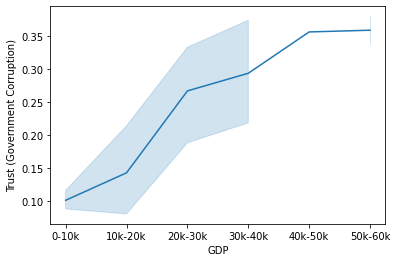

In [102]:
sns.lineplot( x=df_trust_merge['GDP'],y=df_trust_merge['Trust (Government Corruption)'])

**Findings suggest that there is a somewhat positive correlation between the trust in the government and GDP. This proves that countries with higher GDP tend to have higher levels of trust in the government.**

#Research Question #6 : Literacy Rates in developed vs. developing countries.

A boolean attribute was created to determine whether a country is developed or developing, 3 bins were created for each 5 years and is used to create a pivot table that is then plotted into a bar chart shown below, showing literacy rate on average of countries over the years of developing vs. developed economies.

In [103]:
df['isDeveloped'] = df[['Status']] != 'Developing'

# Dividing the data into bins of 10 years.
bins1 =  [2000, 2005,  2010, 2015]
labels1 = ['2000s','2005s', '2010s' ]

#Cutting the Year column of our dataframe df into bins given the above array of bins and array of labels for each bin.
df['year'] = pd.cut(df['Year (Literacy Rate)'], bins =bins1, labels =labels1)
medal = df.pivot_table(values='Literacy Rate(%)', index= 'year', columns='isDeveloped')
medal

isDeveloped,False,True
year,,
2000s,80.756995,82.430996
2005s,78.580753,86.666831
2010s,81.626963,94.788944


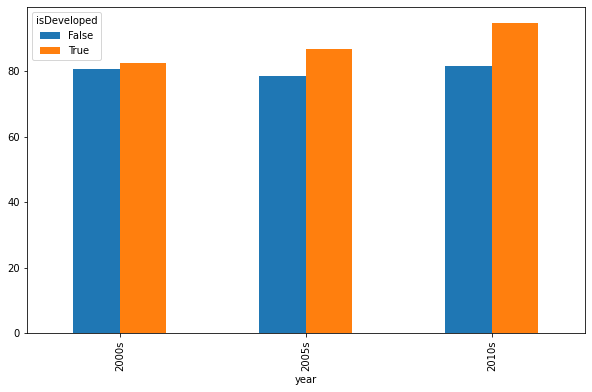

In [104]:
medal.plot(kind='bar', figsize=(10, 6))

### **Feature Engineering**

We want to calcualte the % growth of the GDP over the course of the 4 years to see if the economy is improving or not. "% Growth in GDP" was created with NaA values and a nested loop was used to calculate the values.
Same was repeated for happines score.

In [105]:

df_countries_happiness["% Growth in GDP"] = np.nan
df_countries_happiness["% Growth in Happiness Score"] = np.nan


In [106]:

i=0
while i < len(df_countries_happiness):
    j=0
    while j < len(df_countries_happiness):
        if (df_countries_happiness.iloc[i][0].lower()==df_countries_happiness.iloc[j][0].lower() and df_countries_happiness.iloc[i][14]=='2019'and df_countries_happiness.iloc[j][14]=='2015'):
            df_countries_happiness.iloc[i, df_countries_happiness.columns.get_loc('% Growth in GDP')] = ((df_countries_happiness.iloc[i][8] - df_countries_happiness.iloc[j][8])/ df_countries_happiness.iloc[j][8])*100
                
                
        j=j+1    
        
    i=i+1
    

In [107]:

i=0
while i < len(df_countries_happiness):
    j=0
    while j < len(df_countries_happiness):
        if (df_countries_happiness.iloc[i][0].lower()==df_countries_happiness.iloc[j][0].lower() and df_countries_happiness.iloc[i][14]=='2019'and df_countries_happiness.iloc[j][14]=='2015'):
            df_countries_happiness.iloc[i, df_countries_happiness.columns.get_loc('% Growth in Happiness Score')] = ((df_countries_happiness.iloc[i][7] - df_countries_happiness.iloc[j][7])/ df_countries_happiness.iloc[j][7])*100
                
                
        j=j+1    
        
    i=i+1

In [108]:
df_growth = df_countries_happiness[['Country', '% Growth in GDP', '% Growth in Happiness Score']]
df_growth = df_growth.dropna()
df_growth.head()

,Country,% Growth in GDP,% Growth in Happiness Score
4,Afghanistan,9.436558,-10.405594
9,Albania,7.776526,-4.839685
14,Algeria,6.676319,-7.029438
23,Argentina,3.653501,-7.423182
28,Armenia,10.646828,4.804598


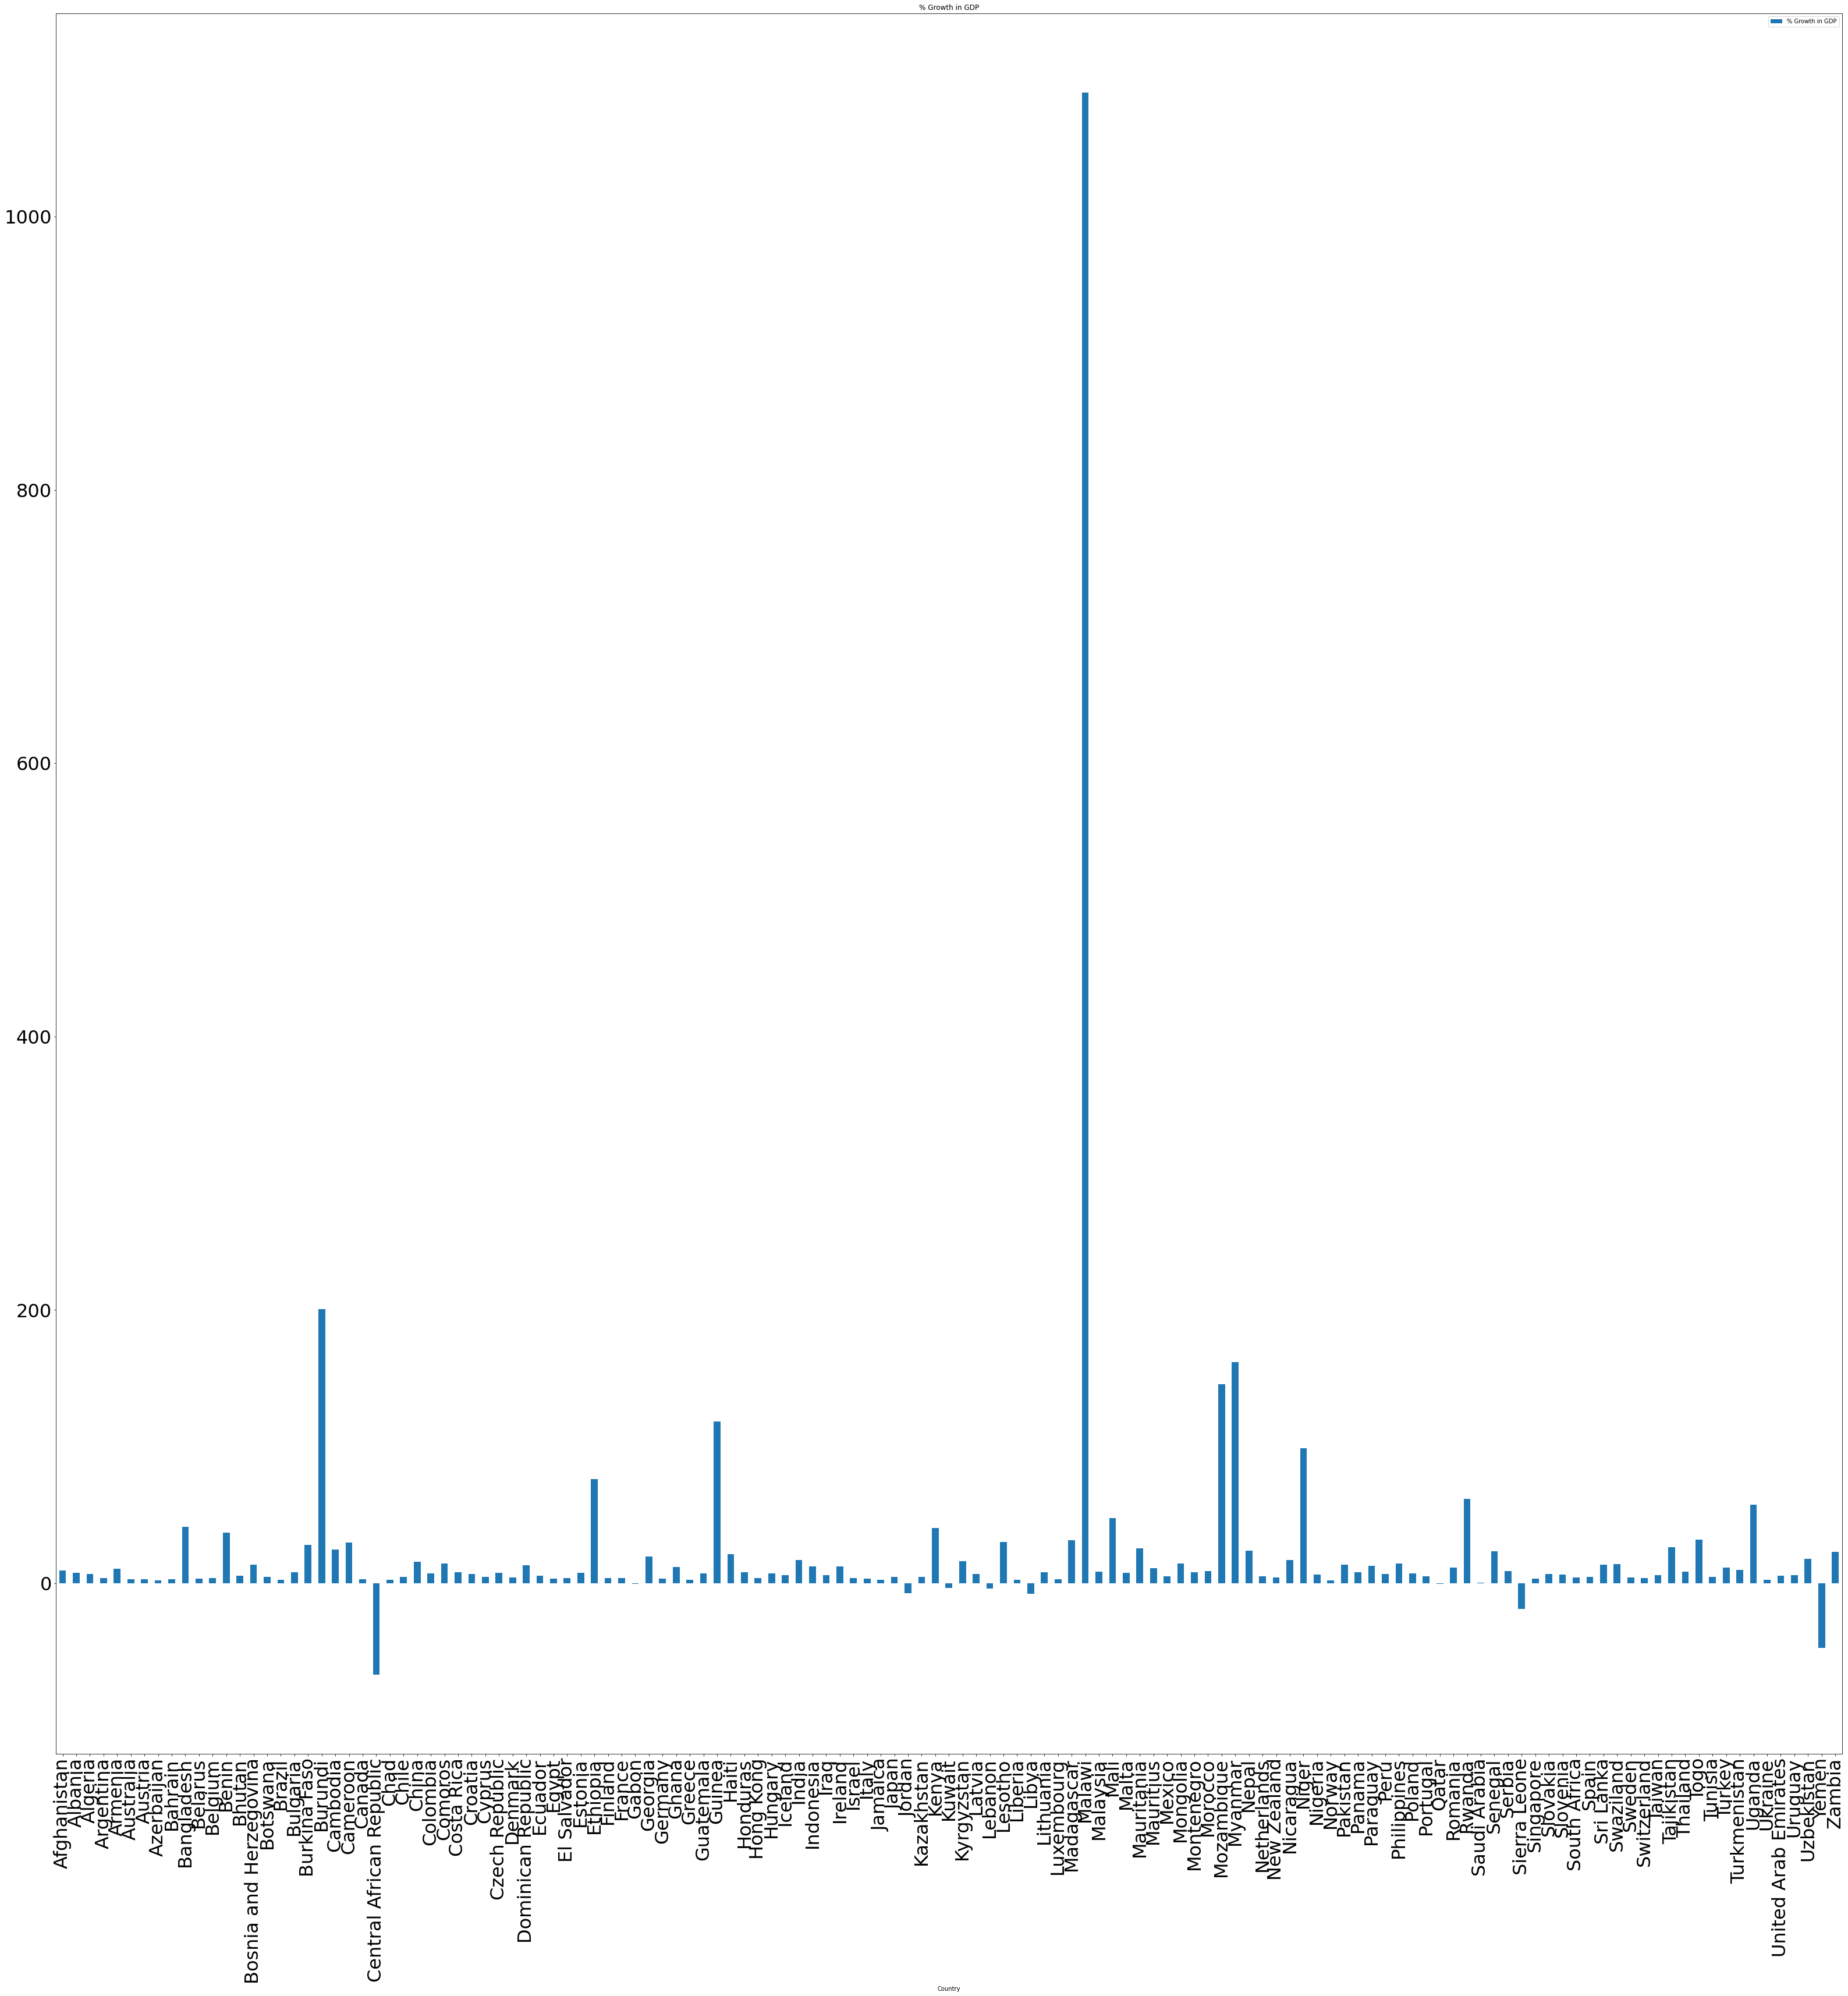

In [118]:

df_growth[['Country','% Growth in GDP']].plot(kind='bar', x="Country",title ="% Growth in GDP", figsize=(55, 55), legend=True, fontsize=32)


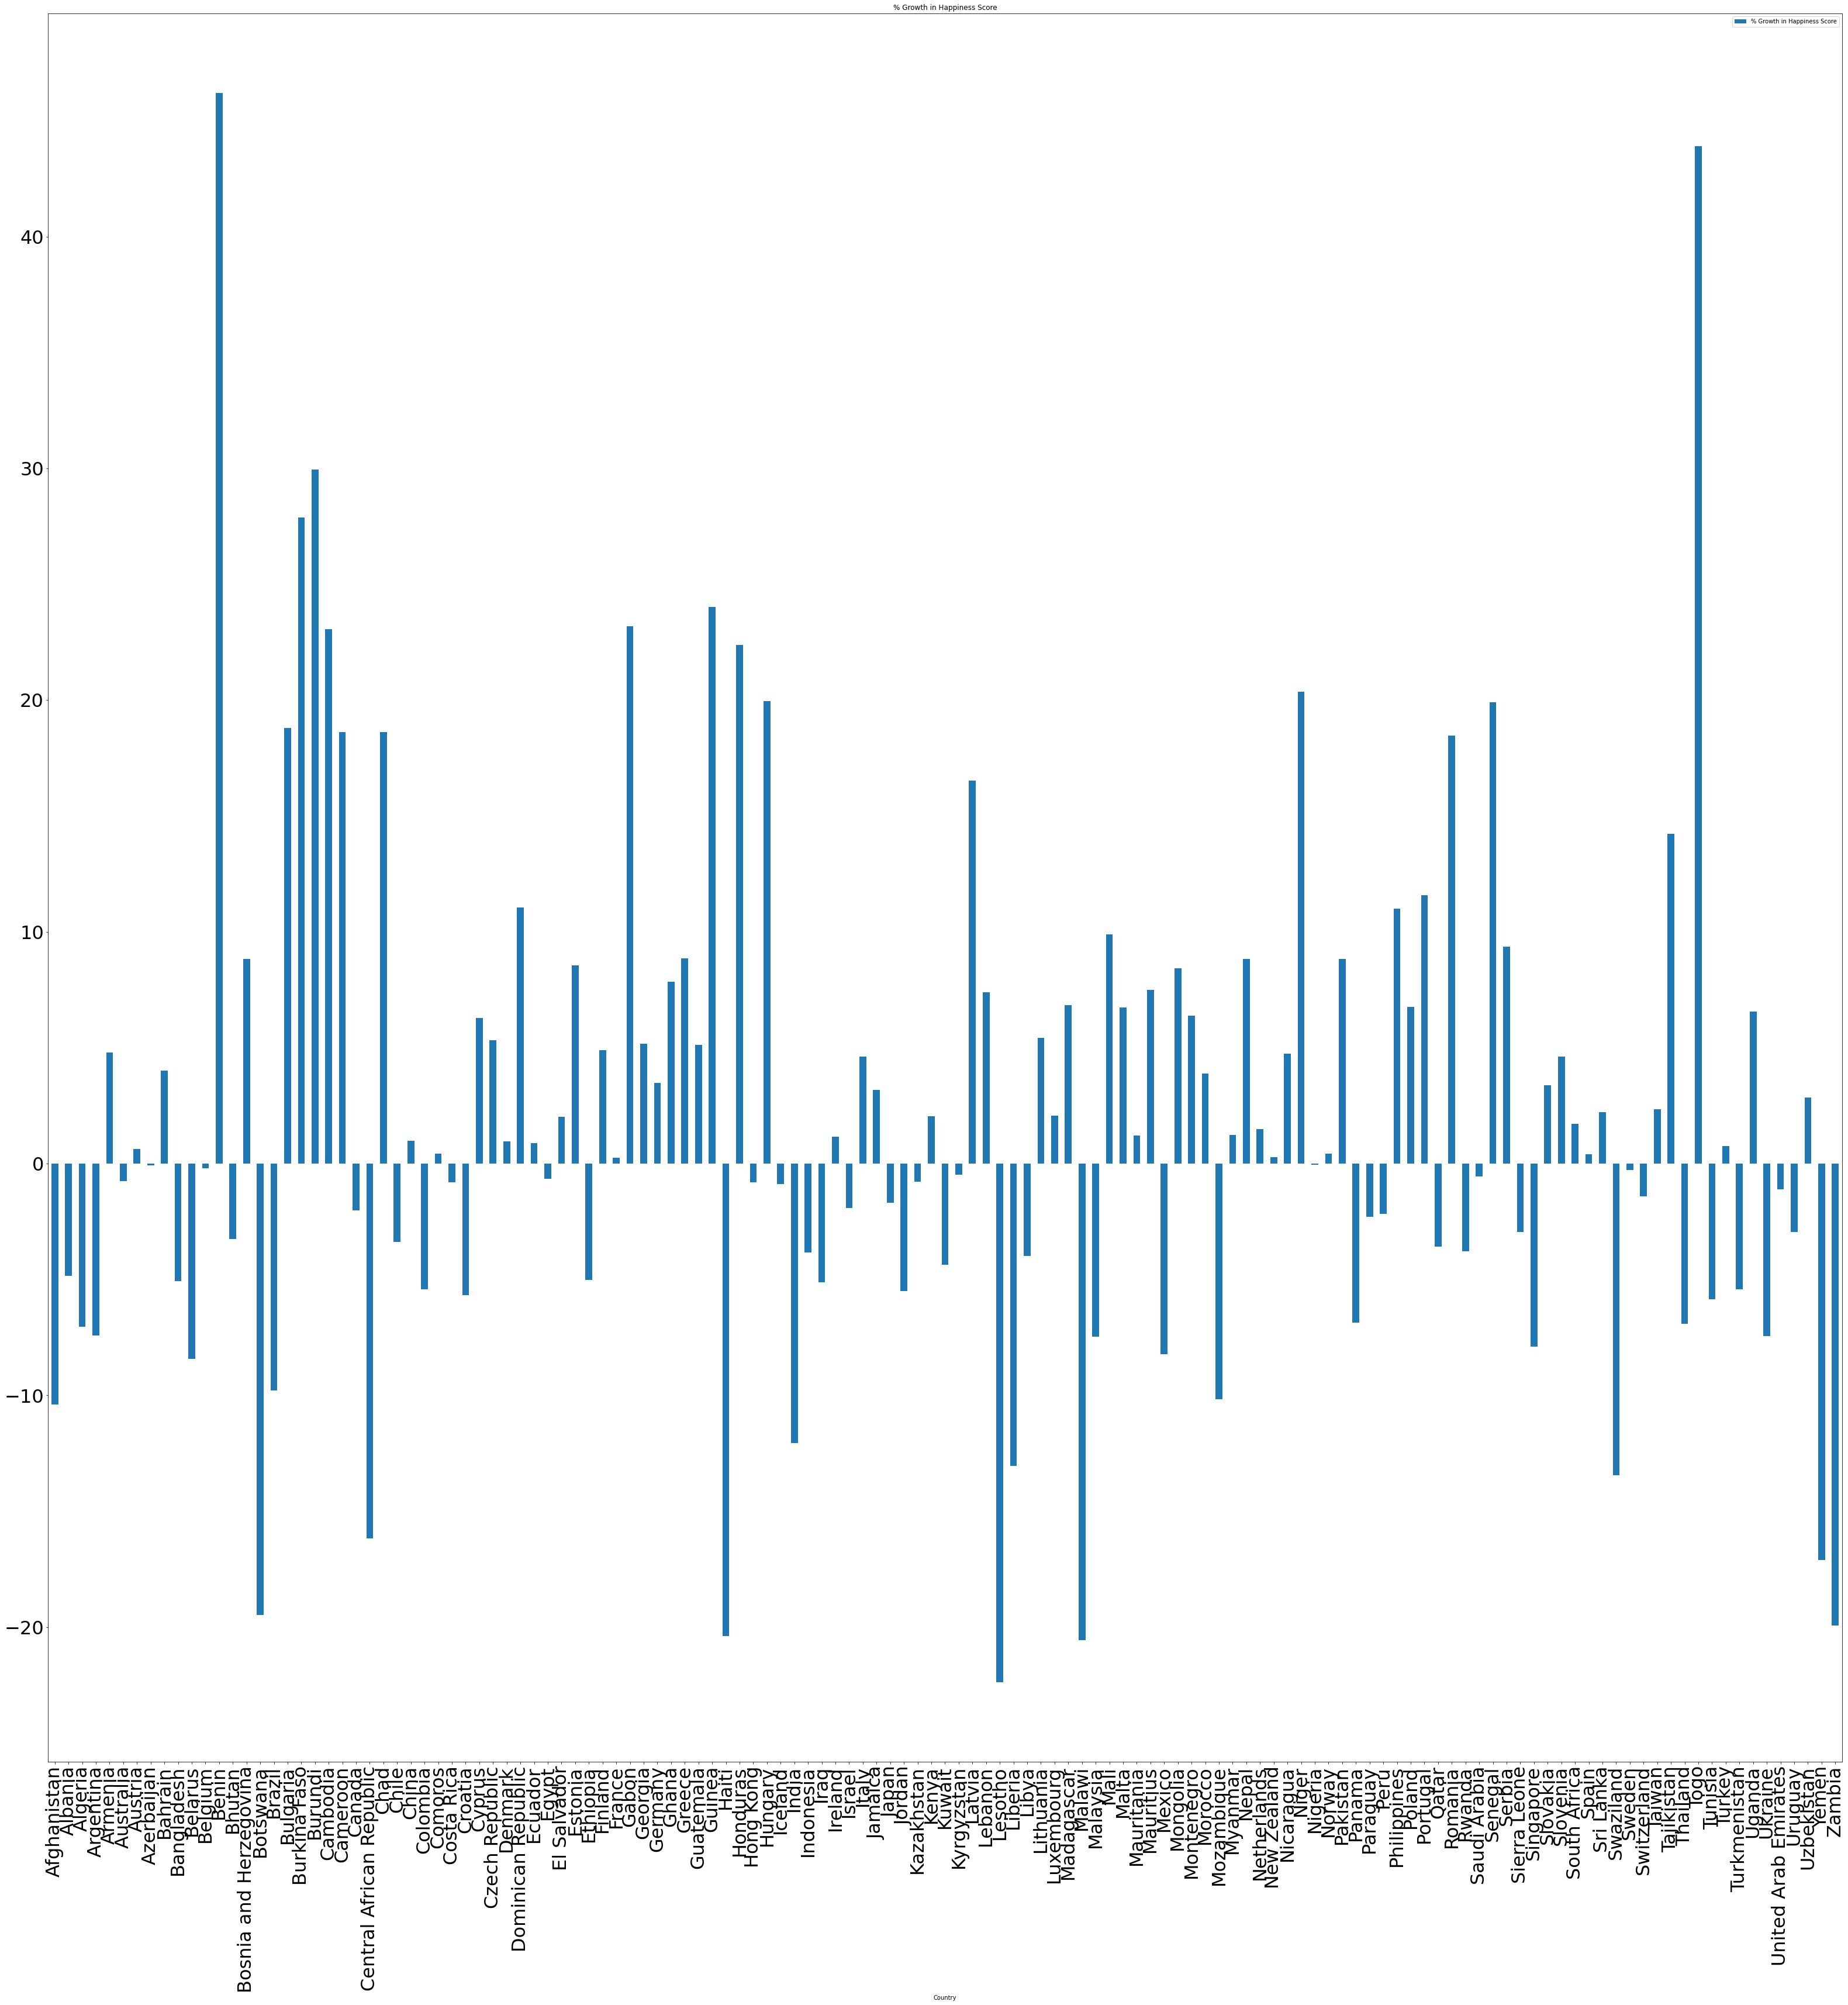

In [119]:
df_growth[['Country','% Growth in Happiness Score']].plot(kind='bar', x="Country",title ="% Growth in Happiness Score", figsize=(55, 55), legend=True, fontsize=32)


**Our findings suggest that the literacy rate in developed countries is always larger than that of developing countries. The literacy rate in developed countries has been continously incresing while in developing countries it has been somewhat stable.**